# READ ME

The dataset is what we call network flow data.  A network flow is a sequence of packets sharing a common source address/port, destination address/port, and protocol (either TCP or UDP).  In the dataset, each row is a flow, which also represents a single example.  The columns are the features.  One column represents the duration of the flow, 6 columns represent packet and byte counts for bi-directional and in each direction (ie, from client to server, server to client, and both).  And one column represents concurrent flow counts.  Which column do you think represents each feature?  What do you think a 'concurrent' flow is?

Flow data is compiled from packet captures (PCAP).  Two parameters of interest are the inactive and active timeout.  Inactive timeout refers to a duration in which there is no activity in a flow (no packets), and the timeout refers to an interval of inactivity in which the flow is segmented, ie, broken up into two flows.  Active timeout is simply a max duration a flow can be before it is segmented.  By default the inactive and active timeout values are 15 seconds and 60 seconds, respectively.  Why do you think we need these timeout values, and why do you think the default values are what they are?

The training dataset comprises 1 hour worth of network traffic.  There are two protocols represented, but the features which give them away are removed, leaving only behavioral aggregate features.  Note that here a 'protocol' refers to the application layer, for example HTTP, FTP, SCTP, SSH, etc.  All flows are TCP.  All features are continuous, meaning that any continuous feature learner, such as k-means, would work.  If you choose to use a discrete feature learner (here discrete means categorical features), you'll need to discretize the features first.

The test dataset comprises 30 min worth of network traffic, and was captured from the same network under the same client parameters as the training dataset, ie, both datasets are sampled from the same underlying distribution.  The test dataset contains an additional column (first column) representing the label.  Make sure to separate the label column when performing inference on your trained model, as the label is not a feature.  This label will be used to determine if an example (flow) in the test set was classified correctly.

1) Your task is to train a classifier which can classify between the two types of network traffic represented.  Test your model on test dataset 01.  Valuable metrics are precision/recall, not accuracy as the test data is imbalanced.  Note that the training data is unlabeled, leading to an unsupervised task.  Do not look at the test dataset when designing the learner.  The learner should not have access to labels.  You can however use the training data to build a validation set for class assignment after training, training initialization, etc, but do not use the test data for this purpose.

2) Test your model on test dataset 02.  Is your performance equivalent?  If not, what about the second test dataset is causing issues?  Try training a different model using a different learner or different setup of your first learner (maybe tweaking hyperparameters) and see if your performance improves.

The overall goal is to learn through applying harder test datasets how different models represent data classes through an understanding of the data itself.  This is important in both obtaining a deep (no pun intended) understanding of the model/learner and also an application domain.  You'll be experimenting with many different learners along the way, as the datasets present unique challenges which often cannot be solved in a 'one size fits all' type approach.

Some questions to think about when picking or designing your learner:
- propositional learners make the IID (independent and identically distributed) assumption, meaning that for flow data, each flow is independent from all other flows, and each flow is sampled from the same underlying distribution.  Is this assumption valid?
- since this is an unsupervised task, how will you determine which class is which in your model?  If you leave this up to chance, you may find your classification accuracy is much less than 50%. Hint: analyze the training data for examples which seems to be different from others.  If you can find representative examples that you think represent the two classes, you can use those to assign class labels after model training.
- What protocols do you think are represented in this dataset?  This isn't important for the learner per-se, but can help you understand how the behavior differs and can lead to better dataset analysis (knowing which features are important, etc).


I NEED SOME HELP?

Videos are in the link below. Feel free to add more links and expand the list.

https://docs.google.com/document/d/1DjSbnPfvqWlgAiVFXU1zL4G2Rkxh_nMDiT5XW6He_4s/edit


# ACTUAL CODE

# useless code

In [ ]:
from IPython.core.display import Math

import matplotlib.pyplot as plt

class ClusterPoint:
  #create the cluster point object in a 6 dimensional plane
  def __init__(self, col1, col2, col3, col4, col5, col6, col7, col8):
      self.cols = [col1, col2, col3, col4, col5, col6, col7, col8]
  #distance from the origin for sorting purposes
  def originDistance(self) -> int:
    pH = (float(cols[0])**2+float(cols[1])**2+float(cols[2])**2
          +float(cols[3])**2+float(cols[4])**2+float(cols[5])**2+
          float(cols[6])**2+float(cols[7])**2)**.5
    return int(round(pH,0))
  def getNum(self, colNum) -> float:
    return self.cols[colNum]


def calcDistance(obj1: ClusterPoint, obj2: ClusterPoint):
  pH = ((obj1.cols[0]-obj2.cols[0])**2+(obj1.cols[1]-obj2.cols[1])**2+(obj1.cols[2]-obj2.cols[2])**2
        +(obj1.cols[3]-obj2.cols[3])**2+(obj1.cols[4]-obj2.cols[4])**2+(obj1.cols[5]-obj2.cols[5])**2)**.5

  return int(round(pH,0))

#name is from previous method name for something else. Just used to sort array
def retHash(obj1):
  return obj1.originDistance()

#reads data
trainFile = open(r"ts2-nb-train01.netflow", "r")
points = []
data = trainFile.readlines()
pointNum = 0
#places data into an object and sorts the array
while pointNum < len(data):
  point = data[pointNum]
  cols = point.split('	')
  testPoint = ClusterPoint(float(cols[0]),float(cols[1]),float(cols[2]),float(cols[3]),
                           float(cols[4]),float(cols[5]), float(cols[6]), float(cols[7]))
  points.insert(0,testPoint)
  pointNum += 1
points.sort(key = retHash, reverse=False)



#stop copying here
half = int(len(points)/2)
x = 0
xCords = []
yCords = []
cent1 = [0.0,0.0,0.0,0.0,0.0,0.0]
while x < half:
  i = 0
  while i < len(cent1):
    cent1[int(i)] += float(points[int(x)].getNum(int(i)))
    i+=1
  j = float(points[x].getNum(3))
  xCords.append(j)
  yCords.append(points[int(x)].getNum(6))
  x+=1
cent2 = [0.0,0.0,0.0,0.0,0.0,0.0]
while x < len(points):
  i = 0
  while i < len(cent1):
    cent2[int(i)] += float(points[int(x)].getNum(int(i)))
    i+=1
  j = float(points[x].getNum(3))
  xCords.append(j)
  yCords.append(points[int(x)].getNum(6))
  x+=1
x = 0
while x < len(cent1):
  cent1[x]/=half
  x+=1
x = 0
while x < len(cent1):
  cent2[x]/=half
  x+=1

# plotting points as a scatter plot
plt.scatter(xCords, yCords, label= "stars", color= "green",
            marker= "*", s=30)

# x-axis label
plt.xlabel('x - axis')
# frequency label
plt.ylabel('y - axis')
# plot title
plt.title('My scatter plot!')
# showing legend
plt.legend()

# function to show the plot
plt.show()



FileNotFoundError: ignored

# sample data graph

sample_data graph

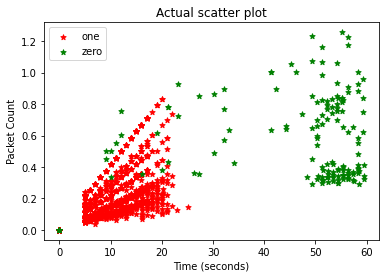

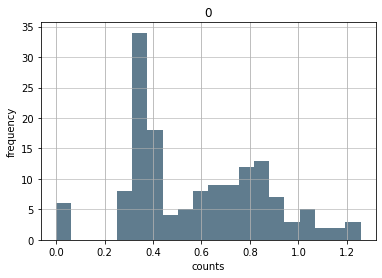

In [ ]:
from os import P_PID
from posixpath import split
from IPython.core.display import Math

import matplotlib.pyplot as plt

trainFile = open(r"ts2-nb-test01.netflow", "r")
zXCoord = []
zYCoord = []
oXCoord = []
oYCoord = []
data = trainFile.readlines()
colTest1 = 1
colTest2 = 2
statPlot = []

for i in data:
  parts = i.split('	')
  if(parts[0] == '0'):
    a = float(parts[colTest1])
    b = float(parts[colTest2])
    zYCoord.append(a/b)
    zXCoord.append(a)
  else:
    a = float(parts[colTest1])
    b = float(parts[colTest2])
    oYCoord.append(a/b)
    oXCoord.append(a)


plt.scatter(oXCoord, oYCoord, label= "one", color= "red",
            marker= "*", s=30)
plt.scatter(zXCoord, zYCoord, label= "zero", color= "green",
            marker= "*", s=30)
# x-axis label
plt.xlabel('Time (seconds)')
# frequency label
plt.ylabel('Packet Count')
# plot title
plt.title('Actual scatter plot')
# showing legend
plt.legend()

# function to show the plot
plt.show()

import pandas as pd
from matplotlib import pyplot as plt2
import numpy as np

fancyArray = np.array(zYCoord)

size, scale = 800, 8
commutes = pd.Series(fancyArray)
commutes.plot.hist(grid = True, bins = 20, color = '#607c8e')
plt2.title("0")
plt2.xlabel('counts')
plt2.ylabel('frequency')
plt2.grid(axis='y', alpha = .75)



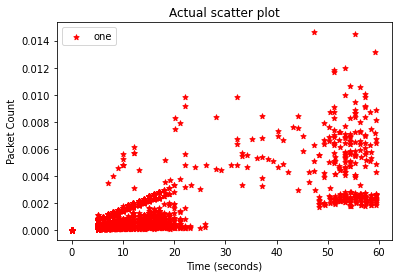

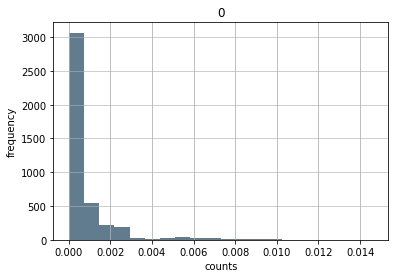

In [ ]:
from os import P_PID
from posixpath import split
from IPython.core.display import Math

import matplotlib.pyplot as plt

trainFile = open(r"ts2-nb-train01.netflow", "r")
zXCoord = []
zYCoord = []
oXCoord = []
oYCoord = []
data = trainFile.readlines()
colTest1 = 0
colTest2 = 4
statPlot = []

for i in data:
  parts = i.split('	')
  a = float(parts[colTest1])
  b = float(parts[colTest2])
  zXCoord.append(a)
  zYCoord.append(b)
  if(a!=0.0):
    statPlot.append(a/b)
  else:
    statPlot.append(a)



plt.scatter(zXCoord, statPlot, label= "one", color= "red",
            marker= "*", s=30)
# x-axis label
plt.xlabel('Time (seconds)')
# frequency label
plt.ylabel('Packet Count')
# plot title
plt.title('Actual scatter plot')
# showing legend
plt.legend()

# function to show the plot
plt.show()

import pandas as pd
from matplotlib import pyplot as plt2
import numpy as np

fancyArray = np.array(statPlot)

size, scale = 800, 8
commutes = pd.Series(fancyArray)
commutes.plot.hist(grid = True, bins = 20, color = '#607c8e')
plt2.title("0")
plt2.xlabel('counts')
plt2.ylabel('frequency')
plt2.grid(axis='y', alpha = .75)



# k-means

k-means built-in class
issue with classifacation is that it strives to create a circle around clusters. Does not work well with data that is mostly seperated by linear properties.

0.8626907073509015
0.8576904647819837
0.6018766756032171


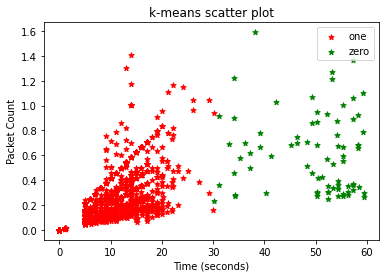

In [ ]:
from IPython.core.display import Math

import matplotlib.pyplot as plt


#reads data
trainFile = open(r"ts2-nb-train01.netflow", "r")
points = []
data = trainFile.readlines()
pointNum = 0
correctPoints = []
#places data into an object and sorts the array
while pointNum < len(data):
  point = data[pointNum]
  cols = point.split('	')
  pH = [float(cols[0]), float(cols[1]), float(cols[4])]
  if(pH[1]!=0.0!=pH[2]):
    testPoint = [pH[0], pH[0]/pH[1], pH[0]/pH[2]]
  elif(pH[1]!=0.0):
    testPoint = [pH[0], pH[0]/pH[1], pH[2]]
  elif(pH[2]!=0.0):
    [pH[0], pH[1], pH[0]/pH[2]]
  else:
    testPoint = pH

  points.insert(0,testPoint)
  pointNum += 1



from sklearn.cluster import KMeans
import numpy as np
fancyArray = np.array(points)
kmeans = KMeans(n_clusters=2).fit(fancyArray)

trainFile = open(r"ts2-nb-test02.netflow", "r")
points = []
data = trainFile.readlines()
pointNum = 0
correctPoints = []
fullCoord = []
#places data into an object and sorts the array
while pointNum < len(data):
  point = data[pointNum]
  cols = point.split('	')
  fullCoord.insert(0,[float(cols[1]),float(cols[2]),
                         float(cols[5])])
  if(fullCoord[0][1]!=0.0!=fullCoord[0][2]):
    testPoint = [fullCoord[0][0], fullCoord[0][0]/fullCoord[0][1], fullCoord[0][0]/fullCoord[0][2]]
  elif(fullCoord[0][1]!=0.0):
    testPoint = [fullCoord[0][0], fullCoord[0][0]/fullCoord[0][1], fullCoord[0][2]]
  elif(0.0!=fullCoord[0][2]):
    testPoint = [fullCoord[0][0], fullCoord[0][1], fullCoord[0][0]/fullCoord[0][2]]
  else:
    testPoint = fullCoord[0]
  correctPoints.insert(0,int(cols[0]))
  points.insert(0,testPoint)
  pointNum += 1

fancyArray2 = np.array(points)
fLabels = kmeans.predict(fancyArray2)

tLabels = []
pointNum = 0
while(pointNum < len(fLabels)):
  if(fLabels[pointNum]==1):
    tLabels.append(0)
  else:
    tLabels.append(1)
  pointNum+=1
labels = np.array(tLabels)
from sklearn.metrics import accuracy_score


print(accuracy_score(correctPoints,labels, normalize=True))

from sklearn.metrics import precision_score

print(precision_score(correctPoints, labels))

from sklearn.metrics import recall_score
print(recall_score(correctPoints, labels, average='macro'))
#let me look at data rq
x = 0
zXCoord=[]
zYCoord=[]
oXCoord=[]
oYCoord=[]
colTest1 = 0
colTest2 = 1

while x < len(points):
  if(labels[x]==0):
    zXCoord.append(points[x][colTest1])
    zYCoord.append(points[x][colTest2])
  else:
    oXCoord.append(points[x][colTest1])
    oYCoord.append(points[x][colTest2])
  x+=1


plt.scatter(oXCoord, oYCoord, label= "one", color= "red",
            marker= "*", s=30)
plt.scatter(zXCoord, zYCoord, label= "zero", color= "green",
            marker= "*", s=30)
# x-axis label
plt.xlabel('Time (seconds)')
# frequency label
plt.ylabel('Packet Count')
# plot title
plt.title('k-means scatter plot')
# showing legend
plt.legend()

# function to show the plot
plt.show()


# Gaussian

Gausian

0.8733240869163199
0.8676042677012609


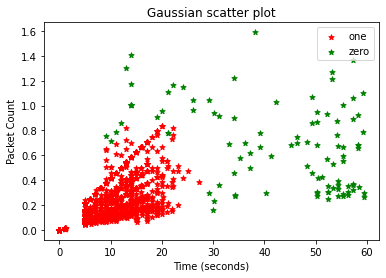

In [ ]:
from IPython.core.display import Math

import matplotlib.pyplot as plt


#reads data
trainFile = open(r"ts2-nb-train01.netflow", "r")
points = []
data = trainFile.readlines()
pointNum = 0
correctPoints = []
#places data into an object and sorts the array
while pointNum < len(data):
  point = data[pointNum]
  cols = point.split('	')
  pH = [float(cols[0]), float(cols[1]), float(cols[4])]
  if(pH[1]!=0.0!=pH[2]):
    testPoint = [pH[0], pH[0]/pH[1], pH[0]/pH[2]]
  elif(pH[1]!=0.0):
    testPoint = [pH[0], pH[0]/pH[1], pH[2]]
  elif(pH[2]!=0.0):
    [pH[0], pH[1], pH[0]/pH[2]]
  else:
    testPoint = pH

  points.insert(0,testPoint)
  pointNum += 1

from sklearn.mixture import GaussianMixture
import numpy as np

fancyArray = np.array(points)
gm = GaussianMixture(n_components=2, max_iter=1000, covariance_type="full").fit(fancyArray)

trainFile = open(r"ts2-nb-test02.netflow", "r")
points = []
data = trainFile.readlines()
pointNum = 0
correctPoints = []
fullCoord = []
#places data into an object and sorts the array
while pointNum < len(data):
  point = data[pointNum]
  cols = point.split('	')
  fullCoord.insert(0,[float(cols[1]),float(cols[2]),
                         float(cols[5])])
  if(fullCoord[0][1]!=0.0!=fullCoord[0][2]):
    testPoint = [fullCoord[0][0], fullCoord[0][0]/fullCoord[0][1], fullCoord[0][0]/fullCoord[0][2]]
  elif(fullCoord[0][1]!=0.0):
    testPoint = [fullCoord[0][0], fullCoord[0][0]/fullCoord[0][1], fullCoord[0][2]]
  elif(0.0!=fullCoord[0][2]):
    testPoint = [fullCoord[0][0], fullCoord[0][1], fullCoord[0][0]/fullCoord[0][2]]
  else:
    testPoint = fullCoord[0]
  correctPoints.insert(0,int(cols[0]))
  points.insert(0,testPoint)
  pointNum += 1

fancyArray2 = np.array(points)
fLabels = gm.predict(fancyArray2)
tLabels = []
pointNum = 0
while(pointNum < len(fLabels)):
  if(fLabels[pointNum]==1):
    tLabels.append(0)
  else:
    tLabels.append(1)
  pointNum+=1
labels = np.array(tLabels)


from sklearn.metrics import accuracy_score


print(accuracy_score(correctPoints,labels, normalize=True))

from sklearn.metrics import precision_score

print(precision_score(correctPoints, labels))


#let me look at data rq
x = 0
zXCoord=[]
zYCoord=[]
oXCoord=[]
oYCoord=[]
colTest1 = 0
colTest2 = 1

while x < len(points):
  if(labels[x]==0):
    zXCoord.append(points[x][colTest1])
    zYCoord.append(points[x][colTest2])
  else:
    oXCoord.append(points[x][colTest1])
    oYCoord.append(points[x][colTest2])
  x+=1


plt.scatter(oXCoord, oYCoord, label= "one", color= "red",
            marker= "*", s=30)
plt.scatter(zXCoord, zYCoord, label= "zero", color= "green",
            marker= "*", s=30)
# x-axis label
plt.xlabel('Time (seconds)')
# frequency label
plt.ylabel('Packet Count')
# plot title
plt.title('Gaussian scatter plot')
# showing legend
plt.legend()

# function to show the plot
plt.show()



0.8207847295864263
0.9971590909090909


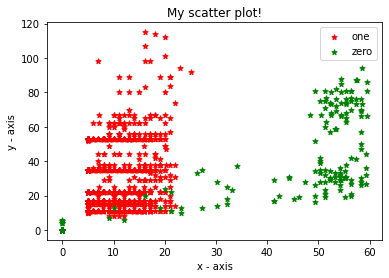

In [ ]:
from IPython.core.display import Math

import matplotlib.pyplot as plt


#reads data
trainFile = open(r"ts2-nb-train01.netflow", "r")
points = []
data = trainFile.readlines()
pointNum = 0
correctPoints = []
#places data into an object and sorts the array
while pointNum < len(data):
  point = data[pointNum]
  cols = point.split('	')
  testPoint = [float(cols[0]),
                           float(cols[3]), float(cols[6])]

  points.insert(0,testPoint)
  pointNum += 1

from sklearn.mixture import GaussianMixture
import numpy as np

fancyArray = np.array(points)
gm = GaussianMixture(n_components=2, max_iter=1000, covariance_type="full").fit(fancyArray)

trainFile = open(r"ts2-nb-test01.netflow", "r")
points = []
data = trainFile.readlines()
pointNum = 0
correctPoints = []
#places data into an object and sorts the array
while pointNum < len(data):
  point = data[pointNum]
  cols = point.split('	')
  testPoint = [float(cols[1]),
                           float(cols[4]),float(cols[7])]
  correctPoints.insert(0,int(cols[0]))
  points.insert(0,testPoint)
  pointNum += 1

fancyArray2 = np.array(points)
labels = gm.predict(fancyArray2)



from sklearn.metrics import accuracy_score


print(accuracy_score(correctPoints,labels, normalize=True))

from sklearn.metrics import precision_score

print(precision_score(correctPoints, labels))


#let me look at data rq
x = 0
zXCoord=[]
zYCoord=[]
oXCoord=[]
oYCoord=[]
colTest1 = 0
colTest2 = 1

while x < len(points):
  if(labels[x]==0):
    zXCoord.append(points[x][colTest1])
    zYCoord.append(points[x][colTest2])
  else:
    oXCoord.append(points[x][colTest1])
    oYCoord.append(points[x][colTest2])
  x+=1


plt.scatter(oXCoord, oYCoord, label= "one", color= "red",
            marker= "*", s=30)
plt.scatter(zXCoord, zYCoord, label= "zero", color= "green",
            marker= "*", s=30)
# x-axis label
plt.xlabel('x - axis')
# frequency label
plt.ylabel('y - axis')
# plot title
plt.title('My scatter plot!')
# showing legend
plt.legend()

# function to show the plot
plt.show()
